In [ ]:
%pip install yfinance

[*********************100%***********************]  5 of 5 completed


Optimized weights:  [3.36429704e-01 0.00000000e+00 1.56125113e-17 2.94656081e-01
 3.68914215e-01]
Optimized return:  0.23188720956939818
Optimized stddev:  0.2418495043161651
Optimized Sharpe Ratio:  0.917459848416019


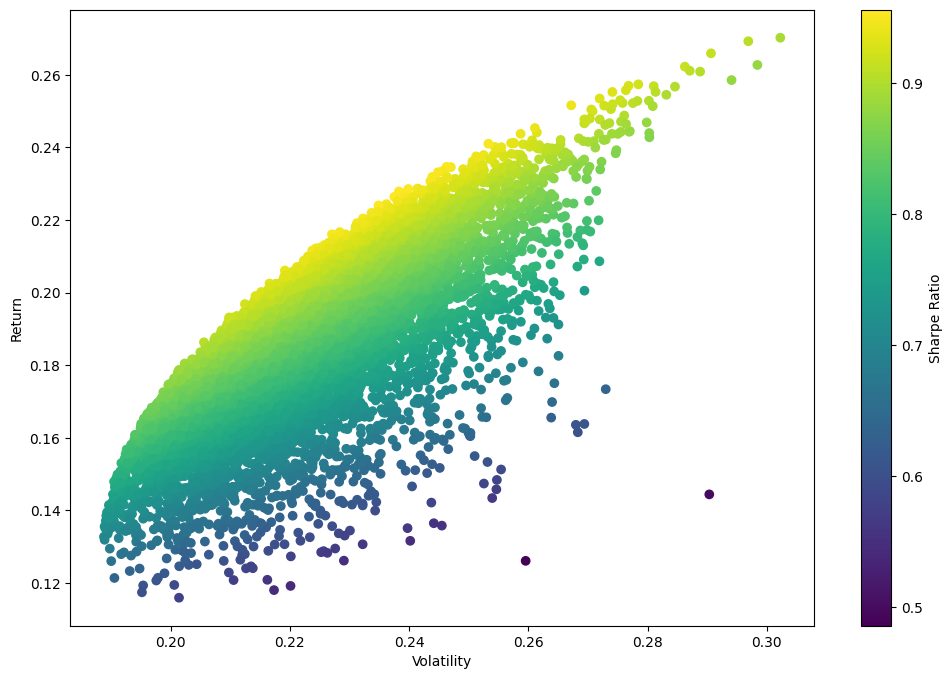

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize 

#Step 1: Fetch stock data over an extended period.
tickers = ['AAPL', 'MSFT', 'JNJ', 'PG', 'JPM']
data = yf.download(tickers, start="2018-01-01", end="2023-01-01")['Adj Close']

#Step 2: Create a database of closing prices
stock_data = data

#Step 3: Calculate the daily returns
daily_returns = stock_data.pct_change().dropna()

#Step 4: Define portfolio performance function
def portfolio_performance(weights, returns, risk_free_rate=0.01):
    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev
    return np.array([portfolio_return, portfolio_stddev, sharpe_ratio])

#Step 5: Define constraints and bounds
def check_sum_of_weights(weights):
    return np.sum(weights) - 1

constraints = ({'type': 'eq', 'fun': check_sum_of_weights})
bounds = tuple((0, 1) for _ in range(len(tickers)))

#Step 6: Define function to minimize inverse Sharpe ratio
def minimize_inverse_sharpe_ratio(weights):
    return 1 / portfolio_performance(weights, daily_returns)[2]

#Step 7: Define initial guess
initial_guess = [1 / len(tickers) for _ in range(len(tickers))]

#Step 8: Optimize the portfolio to maximize the Sharpe Ratio
optimized_result = minimize(minimize_inverse_sharpe_ratio, initial_guess, 
                            method='SLSQP', bounds=bounds, constraints=constraints)

#The resulting optimized weights after the optimization process
optimized_weights = optimized_result.x
print("Optimized weights: ", optimized_weights) #check your model is running

#Step 9: Calculate the metrics for the optimized portfolio weights
optimized_metrics = portfolio_performance(optimized_weights, daily_returns)
print("Optimized return: ", optimized_metrics[0])
print("Optimized stddev: ", optimized_metrics[1])
print("Optimized Sharpe Ratio: ", optimized_metrics[2])


#Step 10: Perform Monte Carlo simulation
num_portfolios = 10000
all_weights = np.zeros((num_portfolios, len(tickers)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for ind in range(num_portfolios):
    # Create random weights
    weights = np.array(np.random.random(len(tickers)))
    weights = weights / np.sum(weights)
    
    # Save weights
    all_weights[ind,:] = weights

    # Expected return
    ret_arr[ind] = np.sum((daily_returns.mean() * weights) *252)

    # Expected volatility
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

#Step 11: Plot the data from the Monte Carlo simulation
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [ ]:
%pip install matplotlib

In [ ]:
%pip install scipy